# Importing libraries and mounting dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import imageio.v2 as imageio
import random
import os
import re
import tensorflow as tf
from tensorflow.keras import layers,models
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV, LeaveOneOut, KFold
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Image Generation
The below code generates 2D images (heatmaps) for all postures for a given person. The second at which the image is taken is randomly fixed at 30 and can be changed.

In [ ]:
'''PERSON=4
SECOND=30

directory = f"/content/drive/Shareddrives/Project Sleep/PMD/experiment-i/S{PERSON}"

# Get the list of file names and sort them numerically
file_names = sorted(os.listdir(directory), key=lambda x: int(re.findall(r'\d+', x)[0]))
# Initialize a subplot grid
num_files = len(file_names)
num_cols = 4  # Number of heatmaps per row
num_rows = (num_files + num_cols - 1) // num_cols

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 4*num_rows), dpi=200)
# Plot each heatmap
for i, file_name in enumerate(file_names):
    if file_name.endswith(".txt"):
        file_path = os.path.join(directory, file_name)
        df = pd.read_csv(file_path, sep='\t', header=None).iloc[:,:-1]
        sub = df.iloc[SECOND].values.reshape(64, 32)
        # Calculate subplot index
        row_idx = i // num_cols
        col_idx = i % num_cols
        # Plot heatmap in the appropriate subplot
        sns.heatmap(sub, vmin=0,vmax=1000,ax=axes[row_idx, col_idx],cmap='gray',cbar=False,annot=False, xticklabels=False, yticklabels=False)
# Hide empty subplots
for i in range(num_files, num_rows * num_cols):
    row_idx = i // num_cols
    col_idx = i % num_cols
    axes[row_idx, col_idx].axis('off')
# Adjust layout
plt.tight_layout()
plt.show()'''

# Video Generation
The below code generates a video file for a range of person and posture (at the provided frame rate). The average time for each video is 2 mins.

In [ ]:
PERSONS = range(11, 14)  # Assume 8 persons
POSTURES = range(1, 18)  # Assume 17 postures per person
FRAME_RATE = 1
INPUT_FOLDER = "/content/drive/Shareddrives/Project Sleep/PMD/experiment-i"
OUTPUT_FOLDER = "/content/drive/Shareddrives/Project Sleep/Generated Videos"
os.makedirs(OUTPUT_FOLDER, exist_ok=True)

# Loop through each person and posture
for PERSON in PERSONS:
    for POSTURE in POSTURES:
        # Define directory and output video file name
        directory = f"{INPUT_FOLDER}/S{PERSON}"
        selected_file = f"{POSTURE}.txt"
        file_path = os.path.join(directory, selected_file)
        output_video = f"{OUTPUT_FOLDER}/Video_S{PERSON}_P{POSTURE}.mp4"

        # Read the selected file
        df = pd.read_csv(file_path, sep='\t', header=None).iloc[:,:-1]

        # Create a writer object to write the frames into a video
        writer = imageio.get_writer(output_video, fps=FRAME_RATE)

        # Plot and add each heatmap to the video
        for i in range(len(df)):
            # Extract the heatmap data for the current second
            sub = df.iloc[i].values.reshape(64, 32)

            # Plot the heatmap without time and axis labels
            plt.figure(figsize=(4, 6))
            sns.heatmap(sub, vmin=0, vmax=1000, cmap='magma', cbar=False, xticklabels=False, yticklabels=False)

            # Save the current plot as an image
            temp_image_path = f"temp_image_{i}.png"
            plt.savefig(temp_image_path, bbox_inches='tight', pad_inches=0)  # Ensure no extra white space around the image
            plt.close()

            # Read the saved image and add it to the video
            image = imageio.imread(temp_image_path)
            writer.append_data(image)

            # Remove the temporary image file
            os.remove(temp_image_path)

        # Close the writer
        writer.close()
        print(f"Video for S{PERSON}-P{POSTURE} created successfully.")

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(


Video for S11-P1 created successfully.


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(


Video for S11-P2 created successfully.


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(


Video for S11-P3 created successfully.


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(


Video for S11-P4 created successfully.


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(


Video for S11-P5 created successfully.


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(


Video for S11-P6 created successfully.


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(


Video for S11-P7 created successfully.


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(


Video for S11-P8 created successfully.


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(


Video for S11-P9 created successfully.


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(


Video for S11-P10 created successfully.


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(


Video for S11-P11 created successfully.


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(


Video for S11-P12 created successfully.


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(


Video for S11-P13 created successfully.


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(


Video for S11-P14 created successfully.


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(


Video for S11-P15 created successfully.


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(


Video for S11-P16 created successfully.


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(


Video for S11-P17 created successfully.


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(


Video for S12-P1 created successfully.


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(


Video for S12-P2 created successfully.


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(


Video for S12-P3 created successfully.


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(


Video for S12-P4 created successfully.


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(


Video for S12-P5 created successfully.


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(


Video for S12-P6 created successfully.


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(


Video for S12-P7 created successfully.


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(


Video for S12-P8 created successfully.


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(


Video for S12-P9 created successfully.


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(


Video for S12-P10 created successfully.


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(


Video for S12-P11 created successfully.


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(


Video for S12-P12 created successfully.


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(


Video for S12-P13 created successfully.


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(


Video for S12-P14 created successfully.


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(


Video for S12-P15 created successfully.


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(


Video for S12-P16 created successfully.


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(


Video for S12-P17 created successfully.


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(


Video for S13-P1 created successfully.


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(


Video for S13-P2 created successfully.


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(


Video for S13-P3 created successfully.


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(


Video for S13-P4 created successfully.


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(


Video for S13-P5 created successfully.


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(


Video for S13-P6 created successfully.


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(


Video for S13-P7 created successfully.


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(


Video for S13-P8 created successfully.


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(


Video for S13-P9 created successfully.


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(


Video for S13-P10 created successfully.


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(


Video for S13-P11 created successfully.


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(


Video for S13-P12 created successfully.


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(


Video for S13-P13 created successfully.


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(


Video for S13-P14 created successfully.


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(


Video for S13-P15 created successfully.


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(


Video for S13-P16 created successfully.


/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(


Video for S13-P17 created successfully.


# Generating Image Dataset

16 frames from each video is generated, resulting in 2912 images



In [ ]:
# # Define the range for PERSON and POSTURE
# for PERSON in range(1, 14):
#     for POSTURE in range(1, 15):  # 14 postures for each person

#         # Define directory
#         directory = f"/content/drive/Shareddrives/Project Sleep/PMD/experiment-i/S{PERSON}"

#         # Select the file for which you want to generate the video
#         selected_file = f"{POSTURE}.txt"  # Change to the desired filename

#         # Read the selected file
#         file_path = os.path.join(directory, selected_file)
#         df = pd.read_csv(file_path, sep='\t', header=None).iloc[:, :-1]

#         frames=[i for i in range(10,51)]
#         for i in range(16):
#           frame_no=random.choice(frames)
#           frames.remove(frame_no)
#           frame_image = df.iloc[frame_no].values.reshape(64, 32)

#           image_path = f"/content/drive/Shareddrives/Project Sleep/Image Data/{i}S{PERSON}_P{POSTURE}.png"  # Change the path as needed

#           width=32
#           height=64

#           # plt.figure(figsize=(width / plt.rcParams['figure.dpi'], height / plt.rcParams['figure.dpi']))
#           plt.figure(figsize=(4,6))
#           sns.heatmap(frame_image, vmin=0, vmax=1000, cmap='magma',annot=False,xticklabels=False,yticklabels=False, cbar=False)
#           plt.axis('off')  # Turn off axis
#           plt.savefig(image_path, bbox_inches='tight', pad_inches=0)  # Save without extra whitespace
#           plt.close()

# Label generation


In [ ]:
# Define the directory containing the images
image_directory = "/content/drive/Shareddrives/Project Sleep/Image Data"

# List of posture names
posture_names = ['Supine', 'Right', 'Left', 'Right', 'Right', 'Left', 'Left', 'Supine',
                 'Supine', 'Supine', 'Supine', 'Supine', 'Right Fetus', 'Left Fetus']

# Initialize a dictionary to store labels
labels = {}

# Iterate over the files in the directory
for filename in os.listdir(image_directory):
    if filename.endswith(".jpg") or filename.endswith(".png"):  # Ensure the file is an image
        # Extract the posture number from the filename
        posture_number = filename.split("_")[1][1:]  # Assuming the filename format is 'S[number]_P[number]'
        posture_number=int(posture_number[:-4])

        # Assign the corresponding posture name as label
        labels[filename] = posture_names[posture_number - 1]  # Adjust index to start from 0

# Model Building - 2D CNN



In [ ]:
image_directory = "/content/drive/Shareddrives/Project Sleep/Image Data"

image_paths = [os.path.join(image_directory, filename) for filename in labels.keys()]
posture_labels = list(labels.values())

images = []
for img_path in image_paths:
    img = load_img(img_path, target_size=(32, 64))  # Resize the images to a common size
    img_array = img_to_array(img) / 255.0
    images.append(img_array)

In [ ]:
X = np.array(images)
y = np.array(posture_labels)
x_train, x_val, y_train, y_val = train_test_split(X, posture_labels, test_size=0.3, random_state=42)

In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 64 ,3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(5,activation='softmax')  # Output layer with softmax activation for multiclass classification
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # Use sparse categorical crossentropy since the labels are not one-hot encoded
              metrics=['accuracy'])
label_encoder = LabelEncoder()
label_encoder.fit(y_train)

y_train_encoded = label_encoder.transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

In [ ]:
pred = model.fit(x_train, y_train_encoded, epochs=10, validation_data=(x_val, y_val_encoded))


Epoch 1/10
64/64 [==============================] - 4s 55ms/step - loss: 0.4644 - accuracy: 0.8508 - val_loss: 0.0175 - val_accuracy: 0.9989
Epoch 2/10
64/64 [==============================] - 3s 53ms/step - loss: 0.0118 - accuracy: 0.9966 - val_loss: 0.0013 - val_accuracy: 1.0000
Epoch 3/10
64/64 [==============================] - 4s 62ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 2.1862e-04 - val_accuracy: 1.0000
Epoch 4/10
64/64 [==============================] - 5s 82ms/step - loss: 2.1203e-04 - accuracy: 1.0000 - val_loss: 1.2082e-04 - val_accuracy: 1.0000
Epoch 5/10
64/64 [==============================] - 4s 60ms/step - loss: 1.1268e-04 - accuracy: 1.0000 - val_loss: 9.1373e-05 - val_accuracy: 1.0000
Epoch 6/10
64/64 [==============================] - 3s 54ms/step - loss: 7.4721e-05 - accuracy: 1.0000 - val_loss: 6.5910e-05 - val_accuracy: 1.0000
Epoch 7/10
64/64 [==============================] - 4s 56ms/step - loss: 5.1957e-05 - accuracy: 1.0000 - val_loss: 4.4497e-05 

### Downsampling

In [ ]:
#Downsampling

from sklearn.utils import resample
x_train_flattened = x_train.reshape(x_train.shape[0], -1)
train_data=np.column_stack((x_train_flattened,y_train_encoded))
balanced_data = np.empty((0, train_data.shape[1]), dtype=train_data.dtype)
        # Separate majority and minority classes

majority_class = train_data[train_data[:, -1] == 4]
minority_class = train_data[train_data[:, -1] !=4]
n_samples_to_downsample = min(len(majority_class), len(minority_class))

        # Downsample majority class
majority_downsampled = resample(majority_class,
                                        replace=False,  # sample without replacement
                                        n_samples=n_samples_to_downsample,  # match minority class
                                        random_state=42)  # reproducible results
print(len(majority_downsampled),len(majority_class))
downsampled = np.concatenate([majority_downsampled, minority_class])
balanced_data = np.concatenate([balanced_data, downsampled])
np.random.shuffle(balanced_data)
x_balanced = balanced_data[:, :-1]
# Reshape flattened data back to original shape
x_balanced_reshaped = x_balanced.reshape(x_balanced.shape[0], 32, 64, 3)

y_balanced = balanced_data[:, -1]


882 882


In [ ]:
#Downsampling
pred = model.fit(x_balanced_reshaped, y_balanced, epochs=10, validation_data=(x_val, y_val_encoded))


Epoch 1/10
64/64 [==============================] - 15s 188ms/step - loss: 1.7157e-05 - accuracy: 1.0000 - val_loss: 1.6137e-05 - val_accuracy: 1.0000
Epoch 2/10
64/64 [==============================] - 8s 132ms/step - loss: 1.3272e-05 - accuracy: 1.0000 - val_loss: 1.2794e-05 - val_accuracy: 1.0000
Epoch 3/10
64/64 [==============================] - 9s 140ms/step - loss: 1.0782e-05 - accuracy: 1.0000 - val_loss: 1.0745e-05 - val_accuracy: 1.0000
Epoch 4/10
64/64 [==============================] - 8s 125ms/step - loss: 8.9417e-06 - accuracy: 1.0000 - val_loss: 8.9634e-06 - val_accuracy: 1.0000
Epoch 5/10
64/64 [==============================] - 5s 81ms/step - loss: 7.6158e-06 - accuracy: 1.0000 - val_loss: 7.7152e-06 - val_accuracy: 1.0000
Epoch 6/10
64/64 [==============================] - 7s 107ms/step - loss: 6.5300e-06 - accuracy: 1.0000 - val_loss: 6.6838e-06 - val_accuracy: 1.0000
Epoch 7/10
64/64 [==============================] - 5s 82ms/step - loss: 5.6353e-06 - accuracy: 1.00

### Oversampling


In [ ]:
#Oversampling
from imblearn.over_sampling import SMOTE

# Apply SMOTE for oversampling
smote = SMOTE(random_state=42)
x_train_flattened = x_train.reshape(x_train.shape[0], -1)
x_train_oversampled, y_train_oversampled = smote.fit_resample(x_train_flattened, y_train_encoded)

# Stack oversampled data
train_data_oversampled = np.column_stack((x_train_oversampled, y_train_oversampled))

# Shuffle the balanced dataset
np.random.shuffle(train_data_oversampled)

# Separate features and target
x_oversampled = train_data_oversampled[:, :-1]
x_oversampled_reshaped = x_oversampled.reshape(x_oversampled.shape[0], 32, 64, 3)
y_oversampled = train_data_oversampled[:, -1]


In [ ]:
pred = model.fit(x_oversampled_reshaped, y_oversampled, epochs=10, validation_data=(x_val, y_val_encoded))


Epoch 1/10
138/138 [==============================] - 17s 115ms/step - loss: 1.1016e-05 - accuracy: 1.0000 - val_loss: 7.5828e-06 - val_accuracy: 1.0000
Epoch 2/10
138/138 [==============================] - 11s 81ms/step - loss: 6.3057e-06 - accuracy: 1.0000 - val_loss: 4.7360e-06 - val_accuracy: 1.0000
Epoch 3/10
138/138 [==============================] - 12s 86ms/step - loss: 3.9675e-06 - accuracy: 1.0000 - val_loss: 3.0844e-06 - val_accuracy: 1.0000
Epoch 4/10
138/138 [==============================] - 12s 86ms/step - loss: 2.7027e-06 - accuracy: 1.0000 - val_loss: 2.1980e-06 - val_accuracy: 1.0000
Epoch 5/10
138/138 [==============================] - 12s 86ms/step - loss: 1.9280e-06 - accuracy: 1.0000 - val_loss: 1.6630e-06 - val_accuracy: 1.0000
Epoch 6/10
138/138 [==============================] - 12s 87ms/step - loss: 1.4435e-06 - accuracy: 1.0000 - val_loss: 1.3264e-06 - val_accuracy: 1.0000
Epoch 7/10
138/138 [==============================] - 12s 86ms/step - loss: 1.1209e-06 

### Class Weights


In [ ]:
from sklearn.utils.class_weight import compute_class_weight

# Calculate class weights
class_weights = compute_class_weight(class_weight='balanced',classes= np.unique(y_train_encoded), y=y_train_encoded)

# Convert class weights to a dictionary
class_weights_dict = dict(zip(np.unique(y_train_encoded), class_weights))


In [ ]:
pred = model.fit(x_train, y_train_encoded,
                 epochs=10,
                 validation_data=(x_val, y_val_encoded),
                 class_weight=class_weights_dict)


Epoch 1/10
64/64 [==============================] - 8s 105ms/step - loss: 0.5691 - accuracy: 0.7610 - val_loss: 0.0604 - val_accuracy: 0.9989
Epoch 2/10
64/64 [==============================] - 6s 86ms/step - loss: 0.0094 - accuracy: 0.9975 - val_loss: 9.1617e-04 - val_accuracy: 1.0000
Epoch 3/10
64/64 [==============================] - 5s 80ms/step - loss: 7.4127e-04 - accuracy: 1.0000 - val_loss: 2.8300e-04 - val_accuracy: 1.0000
Epoch 4/10
64/64 [==============================] - 7s 104ms/step - loss: 2.0005e-04 - accuracy: 1.0000 - val_loss: 1.6595e-04 - val_accuracy: 1.0000
Epoch 5/10
64/64 [==============================] - 5s 82ms/step - loss: 1.0780e-04 - accuracy: 1.0000 - val_loss: 1.0071e-04 - val_accuracy: 1.0000
Epoch 6/10
64/64 [==============================] - 7s 107ms/step - loss: 6.9395e-05 - accuracy: 1.0000 - val_loss: 6.7137e-05 - val_accuracy: 1.0000
Epoch 7/10
64/64 [==============================] - 5s 81ms/step - loss: 4.7735e-05 - accuracy: 1.0000 - val_loss: 

# Validating model


In [ ]:
test_loss, test_acc = model.evaluate(x_val,y_val_encoded, verbose=2)

28/28 - 1s - loss: 2.1654e-05 - accuracy: 1.0000 - 705ms/epoch - 25ms/step


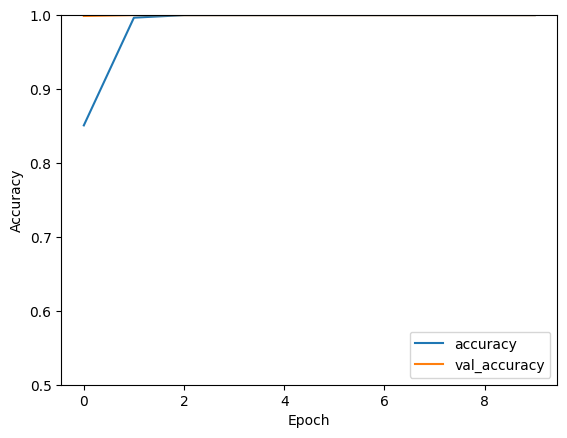

In [ ]:
plt.plot(pred.history['accuracy'], label='accuracy')
plt.plot(pred.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

# Video Classification

###Label Generation

In [ ]:
# Define the directory containing the videos
import os
video_directory='/content/drive/Shareddrives/Project Sleep/Generated Videos'
# List of posture names
posture_names = ['Supine', 'Right', 'Left', 'Right', 'Right', 'Left', 'Left', 'Supine',
                 'Supine', 'Supine', 'Supine', 'Supine', 'Right Fetus', 'Left Fetus','Supine','Supine','Supine']

# Initialize a dictionary to store labels
labels = {}

# Iterate over the files in the directory
for filename in os.listdir(video_directory):
    if filename.endswith(".mp4") :  # Ensure the file is an image
        # Extract the posture number from the filename
        posture_number = filename.split("_")[2][1:]  # Assuming the filename format is 'S[number]_P[number]'
        posture_number=int(posture_number[:-4])

        # Assign the corresponding posture name as label
        labels[filename] = posture_names[posture_number - 1]  # Adjust index to start from 0
labels

{'Video_S1_P1.mp4': 'Supine',
 'Video_S1_P2.mp4': 'Right',
 'Video_S1_P3.mp4': 'Left',
 'Video_S1_P4.mp4': 'Right',
 'Video_S1_P5.mp4': 'Right',
 'Video_S1_P6.mp4': 'Left',
 'Video_S1_P7.mp4': 'Left',
 'Video_S1_P8.mp4': 'Supine',
 'Video_S1_P9.mp4': 'Supine',
 'Video_S1_P10.mp4': 'Supine',
 'Video_S1_P11.mp4': 'Supine',
 'Video_S1_P12.mp4': 'Supine',
 'Video_S1_P13.mp4': 'Right Fetus',
 'Video_S1_P14.mp4': 'Left Fetus',
 'Video_S1_P15.mp4': 'Supine',
 'Video_S1_P16.mp4': 'Supine',
 'Video_S1_P17.mp4': 'Supine',
 'Video_S2_P1.mp4': 'Supine',
 'Video_S2_P2.mp4': 'Right',
 'Video_S2_P3.mp4': 'Left',
 'Video_S2_P4.mp4': 'Right',
 'Video_S2_P5.mp4': 'Right',
 'Video_S2_P6.mp4': 'Left',
 'Video_S2_P7.mp4': 'Left',
 'Video_S2_P8.mp4': 'Supine',
 'Video_S2_P9.mp4': 'Supine',
 'Video_S2_P10.mp4': 'Supine',
 'Video_S2_P11.mp4': 'Supine',
 'Video_S2_P12.mp4': 'Supine',
 'Video_S2_P13.mp4': 'Right Fetus',
 'Video_S2_P14.mp4': 'Left Fetus',
 'Video_S2_P15.mp4': 'Supine',
 'Video_S2_P16.mp4': 'Supi

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import LSTM, Dense, TimeDistributed,Bidirectional
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing import image
import cv2


###Extracting frames from videos

In [ ]:
# Constants
video_directory = '/content/drive/Shareddrives/Project Sleep/Generated Videos'
posture_names = ['Supine', 'Right', 'Left', 'Right', 'Right', 'Left', 'Left', 'Supine',
                 'Supine', 'Supine', 'Supine', 'Supine', 'Right Fetus', 'Left Fetus','Supine','Supine','Supine']

# Load the pre-trained ResNet50 model
base_model = ResNet50(weights='imagenet', include_top=False, pooling='avg')

# Initialize lists to store video features and labels
video_features = []
video_labels = []

# Iterate over the files in the directory
for filename in os.listdir(video_directory):
    if filename.endswith(".mp4"):
        video_path = os.path.join(video_directory, filename)
        cap = cv2.VideoCapture(video_path)

# Check if the video file was successfully opened
        if not cap.isOpened():
          print("Error: Could not open video file")
        exit()

# Initialize a list to store extracted frames
        frames = []

# Iterate through the video frames and extract them
        while True:
          ret, frame = cap.read()  # Read a frame from the video
          if not ret:  # If no frame is returned, break the loop
            break
          frames.append(frame)  # Append the frame to the list

# Release the video capture object
        cap.release()

# Display the number of frames extracted
        print(f"Number of frames extracted: {len(frames)}",filename)

        # Extract frames from the video
          # To store extracted frames
        # Code to extract frames from video and store in the 'frames' list
        # You can use libraries like OpenCV or ffmpeg to extract frames

        # Extract features from each frame using the pre-trained ResNet50 model
        frame_features = []
        for frame in frames:
            img = image.img_to_array(frame)
            img = tf.image.resize(img, (224, 224))  # Resize to match ResNet50 input size
            img = tf.keras.applications.resnet50.preprocess_input(img)
            features = base_model.predict(np.expand_dims(img, axis=0)).flatten()
            frame_features.append(features)
        frame_features = np.array(frame_features)

        # Aggregate frame features to represent the entire video
        video_feature = np.mean(frame_features, axis=0)  # For simplicity, just average the features

        # Get label for the video
        posture_number = int(filename.split("_")[2][1:-4]) - 1  # Adjust index to start from 0
        label = posture_names[posture_number]

        # Append video features and label
        video_features.append(video_feature)
        video_labels.append(label)

# Convert lists to numpy arrays
video_features = np.array(video_features)
video_labels = np.array(video_labels)
np.save('/content/drive/Shareddrives/Project Sleep/video_features.npy', video_features)
np.save('/content/drive/Shareddrives/Project Sleep/video_labels.npy', video_labels)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 40ms/step
Number of frames extracted: 79 Video_S10_P12.mp4
1/1 [==============================] - 0s 22ms/step
Number of frames extracted: 76 Video_S10_P13.mp4
1/1 [==============================] - 0s 26ms/step
Number of frames extracted: 79 Video_S10_P14.mp4
1/1 [==============================] - 0s 59ms/step
Number of frames extracted: 75 Video_S10_P15.mp4
1/1 [==============================] - 0s 26ms/step
Number of frames extracted: 84 Video_S10_P16.mp4
1/1 [==============================] - 0s 24ms/step
Number of frames extracted: 81 Video_S10_P17.mp4
1/1 [==============================] - 0s 44ms/step
Number of frames extracted: 94 Video_S11_P1.mp4
1/1 [==============================] - 0s 22ms/step
Number of frames extracted: 78 Video_S11_P2.mp4
1/1 [==============================] - 0s 33ms/step
Number of frames extracted: 122 Video_S11_P3.mp4
1/1 [==============================] - 0s 

In [4]:
video_features = np.load('/content/drive/Shareddrives/Project Sleep/video_features.npy')
video_labels = np.load('/content/drive/Shareddrives/Project Sleep/video_labels.npy')
video_features

array([[5.7546240e-01, 4.5639727e-02, 0.0000000e+00, ..., 0.0000000e+00,
        1.5983598e-02, 6.0069375e-05],
       [1.1759560e+00, 1.9020300e-01, 0.0000000e+00, ..., 1.0873930e-03,
        3.7004281e-02, 4.0671069e-02],
       [9.1695267e-01, 5.8814578e-02, 0.0000000e+00, ..., 4.8771626e-04,
        5.9577201e-02, 5.9657538e-04],
       ...,
       [1.4827888e+00, 5.7599951e-02, 0.0000000e+00, ..., 0.0000000e+00,
        1.3453856e-01, 2.8836219e-02],
       [1.4003099e+00, 7.4584097e-02, 3.5747748e-03, ..., 8.8218272e-05,
        2.4579623e-01, 1.1888349e-01],
       [9.4895333e-01, 4.5705803e-02, 0.0000000e+00, ..., 3.2495768e-04,
        1.3069153e-01, 1.3519379e-02]], dtype=float32)

### Model Building

In [ ]:
import numpy as np
import h5py
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.initializers import Constant
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Conv3D, MaxPooling3D, Flatten, Dense, Dropout

# Load the pre-extracted features and labels
video_features = np.load('/content/drive/Shareddrives/Project Sleep/video_features.npy')
video_labels = np.load('/content/drive/Shareddrives/Project Sleep/video_labels.npy')

# Split the data into train and validation sets
x_train, x_val, y_train, y_val = train_test_split(video_features, video_labels, test_size=0.3, random_state=42)

# Encode the labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

# Reshape the input data to match Conv3D input format
num_frames = 10  # Define the number of frames per video (adjust as needed)
num_features = video_features.shape[1]
# Define the number of frames per video
num_frames = 10  # Adjust this value as needed

# Reshape the input data to match Conv3D input format
x_train = np.reshape(x_train, (x_train.shape[0], num_frames, -1, 1))
x_val = np.reshape(x_val, (x_val.shape[0], num_frames, -1, 1))


# Define the 3D CNN model
model = Sequential()
model.add(Conv3D(32, kernel_size=(3, 3, 3), activation='relu', input_shape=(num_frames, num_features, 1)))
model.add(MaxPooling3D(pool_size=(2, 2, 2)))
model.add(Conv3D(64, kernel_size=(3, 3, 3), activation='relu'))
model.add(MaxPooling3D(pool_size=(2, 2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train_encoded, epochs=50, batch_size=32, validation_data=(x_val, y_val_encoded))

# Evaluate the model
test_loss, test_acc = model.evaluate(x_val, y_val_encoded)
print(f'Test Accuracy: {test_acc}')


ValueError: cannot reshape array of size 315392 into shape (154,10,newaxis,1)

In [ ]:
# Split data into train and validation sets
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(video_features, video_labels, test_size=0.3, random_state=42)
from sklearn.preprocessing import LabelEncoder

# Label encode the target labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

# Reshape the input data for LSTM
x_train_lstm = np.expand_dims(x_train, axis=-1)  # Add a new axis for the channel
x_val_lstm = np.expand_dims(x_val, axis=-1)

# Build LSTM model
model = Sequential([
    LSTM(128, input_shape=(x_train_lstm.shape[1], x_train_lstm.shape[2]), return_sequences=True),
    LSTM(64),
    Dense(5, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train_lstm, y_train_encoded, epochs=10, validation_data=(x_val_lstm, y_val_encoded))


Epoch 1/10
5/5 [==============================] - 36s 6s/step - loss: 1.5319 - accuracy: 0.4740 - val_loss: 1.4029 - val_accuracy: 0.4925
Epoch 2/10
5/5 [==============================] - 24s 5s/step - loss: 1.3254 - accuracy: 0.5455 - val_loss: 1.3428 - val_accuracy: 0.4925
Epoch 3/10
5/5 [==============================] - 30s 6s/step - loss: 1.2470 - accuracy: 0.5455 - val_loss: 1.2919 - val_accuracy: 0.4925
Epoch 4/10
5/5 [==============================] - 29s 6s/step - loss: 1.2681 - accuracy: 0.5455 - val_loss: 1.2939 - val_accuracy: 0.4925
Epoch 5/10
5/5 [==============================] - 31s 6s/step - loss: 1.2487 - accuracy: 0.5455 - val_loss: 1.2988 - val_accuracy: 0.4925
Epoch 6/10
5/5 [==============================] - 26s 6s/step - loss: 1.2509 - accuracy: 0.5455 - val_loss: 1.3047 - val_accuracy: 0.4925
Epoch 7/10
5/5 [==============================] - 26s 5s/step - loss: 1.2494 - accuracy: 0.5455 - val_loss: 1.2838 - val_accuracy: 0.4925
Epoch 8/10
5/5 [==================

In [3]:
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(video_features, video_labels, test_size=0.3, random_state=42)
from sklearn.preprocessing import LabelEncoder

# Label encode the target labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

# Reshape the input data for LSTM
x_train_lstm = np.expand_dims(x_train, axis=-1)  # Add a new axis for the channel
x_val_lstm = np.expand_dims(x_val, axis=-1)
# Define a function to create the LSTM model
def create_lstm_model(units=128, dropout_rate=0.2):
    model = Sequential([
        LSTM(units, input_shape=(x_train_lstm.shape[1], x_train_lstm.shape[2]), return_sequences=True),
        LSTM(units//2),
        Dense(5, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Create KerasClassifier
lstm_model = KerasClassifier(build_fn=create_lstm_model, epochs=10, batch_size=32, verbose=0)

# Define the grid search parameters
param_grid = {
    'units': [64, 128, 256],
    'dropout_rate': [0.1, 0.2, 0.3]
}

# Perform grid search
grid_search = GridSearchCV(estimator=lstm_model, param_grid=param_grid, cv=3)
grid_result = grid_search.fit(x_train_lstm, y_train_encoded)

# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


NameError: name 'x_train_lstm' is not defined

In [ ]:
# Split data into train and validation sets
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense,Bidirectional

from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(video_features, video_labels, test_size=0.3, random_state=42)
from sklearn.preprocessing import LabelEncoder

# Label encode the target labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

# Reshape the input data for LSTM
x_train_rnn = np.expand_dims(x_train, axis=-1)  # Add a new axis for the channel
x_val_rnn = np.expand_dims(x_val, axis=-1)

# Build LSTM model
from keras.layers import Bidirectional, LSTM

# Build Bidirectional LSTM model
model = Sequential([
    Bidirectional(LSTM(128, return_sequences=True), input_shape=(x_train_lstm.shape[1], x_train_lstm.shape[2])),
    Bidirectional(LSTM(64)),  # Add dropout regularization with a dropout rate of 0.5
    Dense(5, activation='softmax')
])


# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train_lstm, y_train_encoded, epochs=10, validation_data=(x_val_lstm, y_val_encoded))


Epoch 1/10
5/5 [==============================] - 84s 15s/step - loss: 1.5001 - accuracy: 0.4610 - val_loss: 1.3472 - val_accuracy: 0.4925
Epoch 2/10
5/5 [==============================] - 70s 15s/step - loss: 1.3309 - accuracy: 0.5455 - val_loss: 1.3174 - val_accuracy: 0.4925
Epoch 3/10
5/5 [==============================] - 68s 15s/step - loss: 1.2563 - accuracy: 0.5455 - val_loss: 1.3006 - val_accuracy: 0.4925
Epoch 4/10
5/5 [==============================] - 69s 14s/step - loss: 1.2649 - accuracy: 0.5455 - val_loss: 1.2909 - val_accuracy: 0.4925
Epoch 5/10
5/5 [==============================] - 70s 14s/step - loss: 1.2521 - accuracy: 0.5455 - val_loss: 1.3031 - val_accuracy: 0.4925
Epoch 6/10
5/5 [==============================] - 66s 13s/step - loss: 1.2578 - accuracy: 0.5455 - val_loss: 1.2907 - val_accuracy: 0.4925
Epoch 7/10
5/5 [==============================] - 65s 14s/step - loss: 1.2478 - accuracy: 0.5455 - val_loss: 1.2869 - val_accuracy: 0.4925
Epoch 8/10
5/5 [===========

In [4]:
pip install scikeras[tensorflow-gpu]


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 23.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 39.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 26.0 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 3.2.1 which is incompatible.


In [ ]:
from sklearn.model_selection import GridSearchCV, KFold, LeaveOneGroupOut
from scikeras.wrappers import KerasClassifier
from keras.models import Sequential
from keras.layers import LSTM, Dense
import numpy as np
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(video_features, video_labels, test_size=0.3, random_state=42)
from sklearn.preprocessing import LabelEncoder

# Label encode the target labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

# Reshape the input data for LSTM
x_train_lstm = np.expand_dims(x_train, axis=-1)  # Add a new axis for the channel
x_val_lstm = np.expand_dims(x_val, axis=-1)

# Define a function to create the LSTM model
def create_lstm_model(units=128, dropout_rate=0.2):
    model = Sequential([
        LSTM(units, input_shape=(x_train_lstm.shape[1], x_train_lstm.shape[2]), return_sequences=True),
        LSTM(units//2),
        Dense(5, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Create KerasClassifier
lstm_model = KerasClassifier(build_fn=create_lstm_model, verbose=0)

# Define the grid search parameters
param_grid = {
    'batch_size': [12, 14, 20],
    'epochs': [10, 50, 100]
}

# Define cross-validation strategies
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # 5-fold cross-validation
logo = LeaveOneGroupOut()  # LOSO cross-validation, assuming groups are specified

# Perform grid search with 5-fold cross-validation
grid_search_kf = GridSearchCV(estimator=lstm_model, param_grid=param_grid, cv=kf)
grid_result_kf = grid_search_kf.fit(x_train_lstm, y_train_encoded)

# Perform grid search with LOSO cross-validation
group_ids = np.arange(len(video_labels))  # Assuming groups are identified by indices
grid_search_logo = GridSearchCV(estimator=lstm_model, param_grid=param_grid, cv=logo, groups=group_ids)
grid_result_logo = grid_search_logo.fit(x_train_lstm, y_train_encoded)

# Summarize results
print("5-Fold Cross-Validation Best: %f using %s" % (grid_result_kf.best_score_, grid_result_kf.best_params_))
print("LOSO Cross-Validation Best: %f using %s" % (grid_result_logo.best_score_, grid_result_logo.best_params_))


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in 